##### <h3>USFWS Pea Island NWR Exploratory Bar plots (sand weight % by transect, by sample, by survey)  Plot Group 4</h3>


**--Supports:**<br />
transects=['C11','C10','C9','C8','C7','C6','C5','C4','C3','C2','C1','T1','T2','T3','T4','T5','T6','T7','T8','T9','T10',
'T11','T12','T13','T14','T15','T16']

surveys=[201407, 201409, 201504, 201508, 201602, 201605, 201608, 201610 ]

phis=['phi-1','phi-0.5','phi_0','phi_0.5','phi_1','phi_1.25','phi_1.5','phi_1.75','phi_2','phi_2.5','phi_3','phi_3.5','phi_4','remainder']

samples=['S1','S2','S3','S5','S4']
<br /><br />
--Notebook circa: 10/2016
Author: Paul P

<br />
**Instructions:**
To generate plots:
    1. Enter: datapath, fn (source file name), survey, and sample ids and plotpath in the 'User Inputs' cell below
    2. Under the menu Cell select Run All
    
    
**Notes:**
1. Lines commented with three asterisks are older sections that were used to read sediment data from sources prior to spreadsheet standardization...


**Changes:**
1. Adapted notebook to read source sediment data from Excel spreadsheets: 3/28/2017
2. Adapted notebook for github repo posting and presentation: 3/30/2017


<br />
--keywords: Python, pandas, matplotlib, bar plot, median, sand sediment grain size analysis, Pea Island, North Carolina

<h4>Load requisite modules and libraries</h4>

In [39]:
# import requiste Python libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<h4>User Inputs: These are required!!!</h4>

In [40]:
####################################################################################
#datapath='/Users/paulp/GoogleDrive/projects/PeaIslandBeachMonitoring/data/xls/' # where your data is stored...
datapath='/Volumes/R_Research/Coastal_Processes/PeaIsland_BeachMonitoring/Sampling Event Excel Sheets/'
fn='FWSGrainSizeAnalysis2017_08.xlsx'         # excel spreadsheet

survey='201708'
sample='S5'

plotpath='/Users/paulp/GoogleDrive/projects/PeaIslandBeachMonitoring/plots/plotGroup4/' # where your plots end up...
####################################################################################

<h4>Load the data from the source spreadsheet to a pandas dataframe:</h4>

In [41]:
# load the plotting data (the data to be plotted) to a pandas dataframe:

df = pd.read_excel(datapath+fn, skiprows=0).fillna(0)

# use the following lines to read from source: 'USFWS_Survey_Plotting_Data.csv'  
# *** hdr=['group','transect','sample','survey','phi_-1','phi_-0.5','phi_0','phi_0.5','phi_1','phi_1.25','phi_1.5', \
# ***'phi_1.75','phi_2','phi_2.5','phi_3','phi_3.5','remainder']
# *** df=pd.read_csv(path+fn, names=hdr ).fillna(0) 


<h4>Data Preprocessing I: (Adding a 'Group' field and clearing NaN recs)</h4>

In [42]:
## create a populate new group column (field) based on transect id type (e.g., control or transect):
df.loc[df['transect_id'].str[0] == 'C', 'Group'] ='control'
df.loc[df['transect_id'].str[0] =='T', 'Group'] = 'treatment'

## purge any extraneous rows (rows that have no sample date or group in association):
df = df.dropna()

df.loc[df['transect_id'] == 'C8', ['phi_-1', 'phi_-0,5','phi_0', 'phi_0,5','phi_1', 'phi_1,25','phi_1,5','phi_1,75',
'phi_2','phi_2,5','phi_3','phi_3,5','remainder', 'transect_id', 'sample_number', 'summed_weight']]

,phi_-1,"phi_-0,5",phi_0,"phi_0,5",phi_1,"phi_1,25","phi_1,5","phi_1,75",phi_2,"phi_2,5",phi_3,"phi_3,5",remainder,transect_id,sample_number,summed_weight
35,120.27,13.47,3.76,0.52,0.24,0.12,0.14,0.20,0.01,0.00,0.00,0.00,0.00,C8,S1,138.73
36,27.55,17.70,24.05,20.91,11.64,4.57,6.01,8.35,9.47,5.56,0.71,0.05,0.00,C8,S2,136.57
37,3.30,6.06,10.86,14.79,17.89,10.20,16.38,18.70,21.07,12.50,1.39,0.05,0.00,C8,S3,133.19
38,0.11,0.09,0.08,0.22,2.18,3.05,7.00,11.64,32.31,37.06,27.29,5.58,0.18,C8,S4,126.79
39,2.47,6.21,7.69,9.64,20.71,10.42,9.98,11.57,12.12,8.43,2.52,0.29,0.02,C8,S5,102.07


<h4>Data Preprocessing II: (Converting the absolute screen weights as read from the spreadsheet to fraction weight percentages)</h4>

In [43]:
### Convert screen absolute weights posted in the spreadsheets to weight percentages:

# recompute the total weight of the samples, just in case the summed_weight field is flawed...
df['total_weight']=df[['phi_-1', 'phi_-0,5','phi_0', 'phi_0,5','phi_1', 'phi_1,25','phi_1,5','phi_1,75',
'phi_2','phi_2,5','phi_3','phi_3,5','remainder']].sum(axis=1)

# recast the absolute screen weights to weight percent fractions: (This is meathead. There must be a better way!)
df['phi_-1'] = (df['phi_-1'] / df['total_weight'])*100
df['phi_-0,5'] = (df['phi_-0,5'] / df['total_weight'])*100
df['phi_0'] = (df['phi_0'] / df['total_weight'])*100
df['phi_0,5'] = (df['phi_0,5'] / df['total_weight'])*100
df['phi_1'] = (df['phi_1'] / df['total_weight'])*100
df['phi_1,25'] = (df['phi_1,25'] / df['total_weight'])*100
df['phi_1,5'] = (df['phi_1,5'] / df['total_weight'])*100
df['phi_1,75'] = (df['phi_1,75'] / df['total_weight'])*100
df['phi_2'] = (df['phi_2'] / df['total_weight'])*100
df['phi_2,5'] = (df['phi_2,5'] / df['total_weight'])*100
df['phi_3'] = (df['phi_3'] / df['total_weight'])*100
df['phi_3,5'] = (df['phi_3,5'] / df['total_weight'])*100
df['remainder'] = (df['remainder'] / df['total_weight'])*100

df.loc[df['transect_id'] == 'C8', ['phi_-1', 'phi_-0,5','phi_0', 'phi_0,5','phi_1', 'phi_1,25','phi_1,5','phi_1,75',
'phi_2','phi_2,5','phi_3','phi_3,5','remainder', 'transect_id', 'sample_number', 'summed_weight', 'total_weight']]


,phi_-1,"phi_-0,5",phi_0,"phi_0,5",phi_1,"phi_1,25","phi_1,5","phi_1,75",phi_2,"phi_2,5",phi_3,"phi_3,5",remainder,transect_id,sample_number,summed_weight,total_weight
35,86.693577,9.709508,2.710301,0.374829,0.172998,0.086499,0.100915,0.144165,0.007208,0.000000,0.000000,0.000000,0.000000,C8,S1,138.73,138.73
36,20.172805,12.960387,17.610017,15.310830,8.523102,3.346269,4.400674,6.114081,6.934173,4.071172,0.519880,0.036611,0.000000,C8,S2,136.57,136.57
37,2.477663,4.549891,8.153765,11.104437,13.431939,7.658233,12.298221,14.040093,15.819506,9.385089,1.043622,0.037540,0.000000,C8,S3,133.19,133.19
38,0.086758,0.070984,0.063096,0.173515,1.719378,2.405552,5.520940,9.180535,25.483082,29.229434,21.523779,4.400978,0.141967,C8,S4,126.79,126.79
39,2.419908,6.084060,7.534045,9.444499,20.289997,10.208680,9.777604,11.335358,11.874204,8.259038,2.468894,0.284119,0.019594,C8,S5,102.07,102.07


<h4>Data Preprocessing III: (Selecting the sample data of interest from the dataframe and aggregating to simplify presentation)</h4>

In [44]:
### CELL 4 ####
### Do the data munging to select, sort, group and re-configure the data into a form and
### format useful to further analysis:

query_string = 'sample_number == '+'\"'+sample+'\"'
df1 = df.query(query_string).groupby(['transect_id'], sort=False, as_index=False).sum()
# *** df1 = df1.drop(['survey'], axis=1)    

# next we're going to aggregate some of the screens to simplify the plots (for interpretation)
# We'll combine the -0.5 and 0 phi fractions; we'll also combine the 0.5 and 1.0 fractions, and the 
# 1.25, 1.5, 1.75, and 2.0 phi fractions. Then, we bring together the 2.5 and 3.0 fractions, and finally
# merge the 3.5 and remainder. Note that the phi_-1 field remains intact...

# aggregate the 0.5 fractional phis into whole phi divisions and convert to weight percentages:
df1['newphi_0'] = df1['phi_-0,5'] + df1['phi_0']
df1['newphi_1'] = df1['phi_0,5'] + df1['phi_1']

# aggregate the fractional phis (1.25, 1.5, and 1.75) into the phi = 2 screen:
df1['newphi_2'] = df1['phi_1,25'] + df1['phi_1,5'] + df1['phi_1,75'] + df1['phi_2']

# continue aggregating the 0.5 fraction phis:
df1['newphi_3'] = df1['phi_2,5'] + df1['phi_3']
# *** df1['newphi_rem'] = df1['phi_3.5'] + df1['phi_4'] + df1['remainder']
df1['newphi_rem'] = df1['phi_3,5'] + df1['remainder']

# re-organize the data to remove the fractional phis (1.25, 1.5, 1.75 and the old 2.0), then 
# shift the newphi_2 field to position between phi_1 and phi_2.5...
df1 = df1.drop(['phi_1,25','phi_1,5','phi_1,75'], axis=1)


# assign new summed values to old fields:
df1['phi_0'] = df1.newphi_0 
df1['phi_1'] = df1.newphi_1 
df1['phi_2'] = df1.newphi_2 
df1['phi_3'] = df1.newphi_3 
df1['remainder'] = df1.newphi_rem 

# now, delete the no longer needed 0.5 fraction fields:
# *** df1 = df1.drop(['phi_-0.5','phi_0.5','phi_2.5','phi_3.5','phi_4' ], axis=1)
df1 = df1.drop(['phi_-0,5','phi_0,5','phi_2,5','phi_3,5' ], axis=1)

# finally, delete all of the temporary container columns:
df1 = df1.drop(['newphi_0','newphi_1','newphi_2','newphi_3','newphi_rem' ], axis=1)

# add extra dummy control transect C0 to allow for space between control and treatment
# transect bars on final stacked bar plot...below:
line = pd.DataFrame({"transect_id": 'C0', "phi_-1": 0, "phi_0": 0, "phi_1": 0, "phi_2": 0, "phi_3": 0, "remainder": 0 }, index=[11])
df1 = pd.concat([df1.ix[:10], line, df1.ix[11:]]).reset_index(drop=True)  #loc[11]=['C0',0,0,0,0,0,0]

df1.loc[df1['transect_id'] == 'T1']

/Applications/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:48: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,% CLAY:,% COARSE GRAVEL:,% COARSE SAND:,% COARSE SILT:,% FINE GRAVEL:,% FINE SAND:,% FINE SILT:,% GRAVEL:,% MEDIUM GRAVEL:,% MEDIUM SAND:,...,pan_weight,phi_-1,phi_0,phi_1,phi_2,phi_3,remainder,summed_weight,total_weight,transect_id
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.88,3.148735,3.661788,21.513002,54.368493,15.753735,1.554248,198.81,198.81,T1


__Plot the Pea Island Beach Samples__

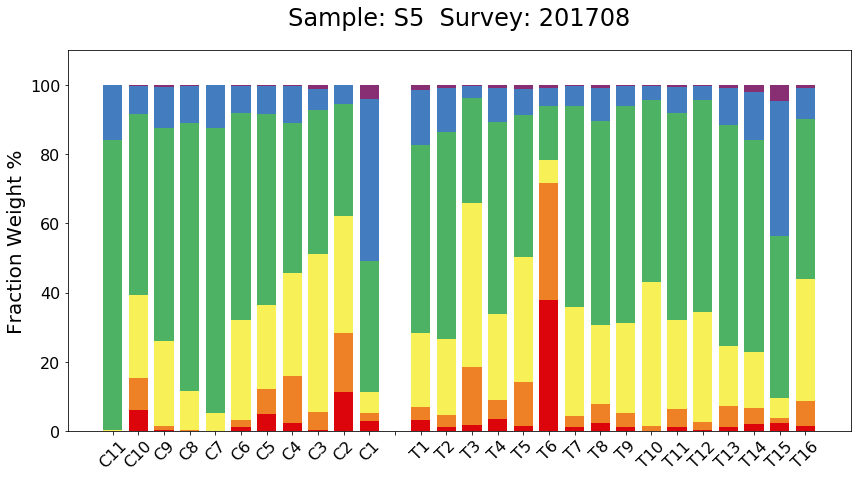

In [45]:
### CELL 5 ####
####### LET'S PLOT SOMETHING #######

f, ax1 = plt.subplots(1, figsize=(15,7))
plt.gcf().subplots_adjust(right=0.85)
#plt.tight_layout()

# Set the bar width
bw = 0.75

# positions of the left bar-boundaries  (bar_l is the position of the left edge of each bar)
bar_l = [i+1 for i in range(len(df1['phi_-1']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i for i in bar_l] 
#+(bw/28)
#phis=['phi_-1','phi_-0.5','phi_0','phi_0.5','phi_1','phi_1.25','phi_1.5','phi_1.75','phi_2','phi_2.5','phi_3','phi_3.5','remainder']
phis=['phi_-1','phi_0','phi_1','phi_2','phi_3','remainder']
transects=['C11','C10','C9','C8','C7','C6','C5','C4','C3','C2','C1',' ','T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T13','T14','T15','T16']
labs=['Gravel','Very Coarse Sand','Coarse Sand','Medium Sand','Fine Sand','Very Fine Sand']

# calc bottom positions for each sand fraction bar segment (it's a giant list!):
# there must be a more elegant way to do this, but time is of the essence, so 'meathead' it is, for now...
bots=[0, df1['phi_-1'],
[i+j for i,j in zip(df1['phi_-1'],df1['phi_0'])],
[i+j+k for i,j,k in zip(df1['phi_-1'],df1['phi_0'],df1['phi_1'])],
[sum(values) for values in zip(df1['phi_-1'],df1['phi_0'],df1['phi_1'],df1['phi_2'])],
[sum(values) for values in zip(df1['phi_-1'],df1['phi_0'],df1['phi_1'],df1['phi_2'],df1['phi_3'])]   
]

# set colors for the bar segments (rainbow) and plot:
colrs=['#dc050c','#ee8026','#f7f056','#4eb265','#437dbf','#882e72']
for phi, bot, colr, lab  in zip(phis, bots, colrs, labs):
    sbp=ax1.bar(bar_l, df1[phi], width=bw, bottom=bot, label=lab, alpha=1, color=colr)

# set the x-axis ticks with names
plt.xticks(tick_pos, transects, size=16, rotation=45 )
plt.yticks(size=16)
plt.ylim(0,110)
plt.bbox_inches=2.0

# label the plot and (optionally) save a copy of the plotted figure:
#plt.xlabel('Transect')
plt.ylabel('Fraction Weight %', size=20)
plt.title('Sample: '+sample+'  Survey: '+survey, size=24, position=([0.5,1.05])) 
#plt.legend(bbox_to_anchor=(1.15, 1.0))

plt.savefig(plotpath+sample+'_'+survey+'_'+'StackedWtPercentFractions.jpeg', res=300) 